# entrainement du MLP #

## import et création du modèle/ onction de prediction ##

In [8]:

import os
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader,Subset
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim=283, hidden_dims=[128, 64], num_classes=12):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.ReLU(),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Linear(hidden_dims[1], num_classes)
        )

    def forward(self, x):
        return self.model(x)


In [3]:
def prediction(path_model,x,threshold):
    model = MLPClassifier()
    model.load_state_dict(torch.load(path_model))
    model.eval()
    with torch.no_grad():
        input = x.unsqueeze(0)
        y = model(input)
        y_probs = torch.sigmoid(y)
        y_preds = (y_probs > threshold).int()
    return y_probs,y_preds

## import du dataset ##

In [7]:
root = "C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset/"
inputs = []
targets = []
for dirpath, dirnames, filenames in os.walk(root):
    for filename in filenames:
        if filename.endswith(".pt"):

                path = root + "/" + filename
                print(path)
                data = torch.load(path,weights_only=False)
                input_array = data["input"]
                print(np.shape(input_array))

                input = input_array.reshape(-1)
                target = data["output"]
                inputs.append(input)
                targets.append(target)


X = torch.stack(inputs)
y = torch.stack(targets)
dataset = TensorDataset(X,y)
indices = list(range(len(dataset)))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

train_set = Subset(dataset, train_idx)
test_set = Subset(dataset, test_idx)
batch_size=32

train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True)
print(type(train_dataloader))
print(f"nombre de fichiers d'entrainement : {len(train_dataloader)*batch_size}")
print(f"nombre de fichiers de test : {len(test_dataloader)*batch_size}")

C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0705_00_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0705_15_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0705_30_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0705_45_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0706_00_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0706_15_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0706_30_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0706_45_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0707_15_00.pt
torch.Size([283])
C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset//25_07_0707_30_00.pt
torch.Size([283])


## entrainement sur dataset ##

[19.175862073898315, 8.065288737416267, 5.907583326101303, 5.334588378667831, 5.088884271681309, 4.907616697251797, 4.75227227807045, 4.550532080233097, 4.382645480334759, 4.229498438537121, 4.041000127792358, 3.89184557646513, 3.7307237461209297, 3.622496910393238, 3.470486581325531, 3.359397232532501, 3.2850588485598564, 3.2029519602656364, 3.131920885294676, 3.051712617278099, 2.9916195161640644, 2.9428610503673553, 2.861100021749735, 2.8419583179056644, 2.785200521349907, 2.763959713280201, 2.757308978587389, 2.6855067908763885, 2.6580452136695385, 2.596863154321909, 2.6186687126755714, 2.592974614351988, 2.5242594592273235, 2.485296741127968, 2.480379857122898, 2.467354129999876, 2.4076522812247276, 2.386160831898451, 2.3742604553699493, 2.3224446326494217, 2.3561426997184753, 2.281932044774294, 2.2523090057075024, 2.221847053617239, 2.200943537056446, 2.1621488872915506, 2.193793974816799, 2.134808734059334, 2.1136580798774958, 2.0869024619460106, 2.114519838243723, 2.04842185974

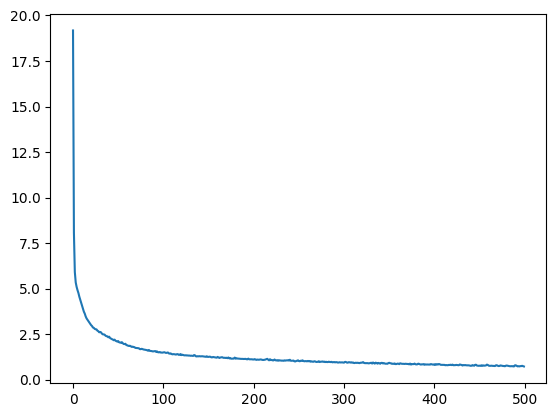

In [12]:
model = MLPClassifier()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.5e-4)
num_epochs = 500
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for X,Y in train_dataloader:
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_losses.append(epoch_train_loss)
    epoch_val_loss = 0
    with torch.no_grad():
        for X,Y in test_dataloader:
            output = model(X)
            epoch_val_loss += criterion(output, Y).item()
    val_losses.append(epoch_val_loss)
torch.save(model.state_dict(), "./model_0_1.pth")
print(train_losses)
print(val_losses)

## plot courbe d'entrainement ##

0.2940820353105664


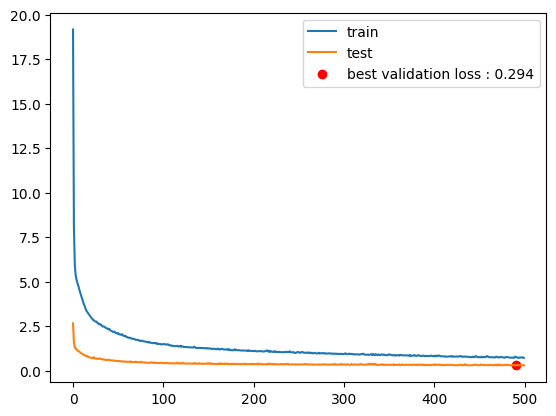

In [26]:

x = np.linspace(0,len(train_losses)-1,len(train_losses))
plt.plot(x,train_losses,label='train')
plt.plot(x,val_losses,label='test')
best = min(val_losses)
i = val_losses.index(best)
print(best)
plt.scatter(i,best,label=f'best validation loss : {round(best,3)}',color='red')
plt.legend()
plt.savefig("./images/Training_trend_MLP_128_64.png")
plt.show()

## test de prédiction ##

### test directement depuis le notebook ###

In [15]:

test = torch.load('C:/Users/hugom/OneDrive/Documents/Stage_2025/dev_Cnn/dataset/25_07_0706_45_00.pt',weights_only=False)
treshold = 0.5
probs,pred = prediction('model_0_1.pth',test['input'],treshold)
print(pred)
print(test['output'])

tensor([[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)
tensor([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])


### test en important le modèle téléchargé (code à copier coller si on veut faire une prédiction dans un autre environnement ###

In [14]:
model = MLPClassifier()
model.load_state_dict(torch.load('model_0_1.pth'))
model.eval()
input = test['input']
output = test['output']
print(output)
with torch.no_grad():
    input = input.unsqueeze(0)
    y = model(input)
    y_probs = torch.sigmoid(y)
    y_preds = (y_probs > 0.5).int()
    print(y_probs)
    print(y_preds)

tensor([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([[1.1962e-05, 2.3529e-04, 7.6281e-03, 7.2035e-01, 1.1259e-02, 5.3601e-01,
         2.5232e-04, 6.2264e-04, 4.3575e-03, 6.0978e-03, 5.2287e-03, 1.2847e-04]])
tensor([[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)
